In [ ]:
import torch
import pandas as pd
import sys
import importlib

from merge_datasets import main
from dcm_to_png import save_dicom_images
from png_to_pth import png_to_pth
from svs_to_pth import convert_svs_to_pth
import utils
from utils import TileExtractor

In [ ]:
scripts_path = '/content/drive/MyDrive/scripts'
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

importlib.reload(utils)

**dcm-to-png**

Image 1 saved to outputs/img-output/image_1.png
Image 2 saved to outputs/img-output/image_2.png
Image 3 saved to outputs/img-output/image_3.png
Image 4 saved to outputs/img-output/image_4.png
Image 5 saved to outputs/img-output/image_5.png
Image 6 saved to outputs/img-output/image_6.png
Image 7 saved to outputs/img-output/image_7.png
Image 8 saved to outputs/img-output/image_8.png
Image 9 saved to outputs/img-output/image_9.png
Image 10 saved to outputs/img-output/image_10.png
Image 11 saved to outputs/img-output/image_11.png
Image 12 saved to outputs/img-output/image_12.png
Image 13 saved to outputs/img-output/image_13.png
Image 14 saved to outputs/img-output/image_14.png
Image 15 saved to outputs/img-output/image_15.png
Image 16 saved to outputs/img-output/image_16.png
Image 17 saved to outputs/img-output/image_17.png
Image 18 saved to outputs/img-output/image_18.png
Image 19 saved to outputs/img-output/image_19.png
Image 20 saved to outputs/img-output/image_20.png
Image 21 saved to 

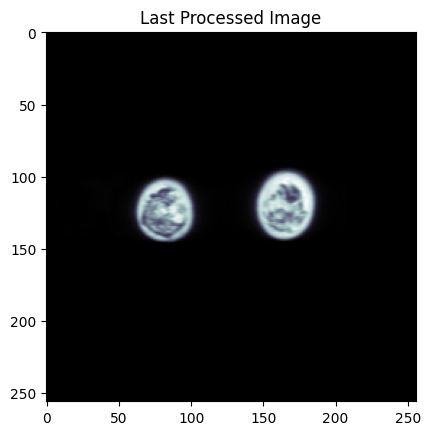

In [6]:
input_directory = "Data/TCGA-AO-A0J8/12-20-2003-NA-NA-54853/1.000000-Loc-83949"
output_directory = "outputs/img-output"
save_dicom_images(input_directory, output_directory)


**png-to-pth**

In [8]:
input_directory = "outputs/img-output"
output_directory = "outputs/embeddings-output"
device = "cuda" if torch.cuda.is_available() else "cpu"
png_to_pth(input_directory, output_directory, device=device)


Found 27 PNG files in outputs/img-output
[SAVED] -> outputs/embeddings-output/image_1.pth
[SAVED] -> outputs/embeddings-output/image_2.pth
[SAVED] -> outputs/embeddings-output/image_3.pth
[SAVED] -> outputs/embeddings-output/image_4.pth
[SAVED] -> outputs/embeddings-output/image_5.pth
[SAVED] -> outputs/embeddings-output/image_6.pth
[SAVED] -> outputs/embeddings-output/image_7.pth
[SAVED] -> outputs/embeddings-output/image_8.pth
[SAVED] -> outputs/embeddings-output/image_9.pth
[SAVED] -> outputs/embeddings-output/image_10.pth
[SAVED] -> outputs/embeddings-output/image_11.pth
[SAVED] -> outputs/embeddings-output/image_12.pth
[SAVED] -> outputs/embeddings-output/image_13.pth
[SAVED] -> outputs/embeddings-output/image_14.pth
[SAVED] -> outputs/embeddings-output/image_15.pth
[SAVED] -> outputs/embeddings-output/image_16.pth
[SAVED] -> outputs/embeddings-output/image_17.pth
[SAVED] -> outputs/embeddings-output/image_18.pth
[SAVED] -> outputs/embeddings-output/image_19.pth
[SAVED] -> outputs

**svs-to-pth**

In [ ]:
metadata_file_path = "Data/Clinical_Data/clinical.tsv"
metadata_df = pd.read_csv(metadata_file_path, sep='\t', low_memory=False)

slide_path = "Data/tcga-svs/TCGA-B6-A0WZ-01A-01-BS1.c88de28c-ac1d-43b3-be4b-4f8b51ca5d68.svs"
output_dir = "output/svs-tileformat-output"
convert_svs_to_pth(slide_path, metadata_df, output_dir)


**Merge TCGA - Clinical Data**

In [5]:
metadata_file_path = 'Data/TCGA-BRCA/metadata.csv'
clinical_file_path = 'Data/Clinical_Data/clinical.tsv'
output_file_path = "outputs/TCGA-Clinical/tcga_brca_idc_ilc_labels_combine.csv"

main(metadata_file_path, clinical_file_path, output_file_path)

Merged rows: 2658
  Subject ID cases.submitter_id label  \
0        NaN       TCGA-LL-A440   pos   
1        NaN       TCGA-LL-A440   pos   
2        NaN       TCGA-LL-A440   pos   
3        NaN       TCGA-LL-A440   neg   
4        NaN       TCGA-LL-A440   neg   

                   diagnoses.primary_diagnosis  
0  Intraductal carcinoma, noninfiltrating, NOS  
1  Intraductal carcinoma, noninfiltrating, NOS  
2  Intraductal carcinoma, noninfiltrating, NOS  
3                       Lobular carcinoma, NOS  
4                       Lobular carcinoma, NOS  
label
neg    2608
pos      50
Name: count, dtype: int64
Saved to outputs/TCGA-Clinical/tcga_brca_idc_ilc_labels_combine.csv


In [ ]:
df = pd.read_csv("outputs/TCGA-Clinical/tcga_brca_idc_ilc_labels_combine.csv")

subject_id_counts = df['Subject ID'].value_counts()
duplicates = subject_id_counts[subject_id_counts > 1]

print(f"Total rows: {len(df)}")
print(f"Unique Subject IDs: {df['Subject ID'].nunique()}")
print(f"Duplicate Subject IDs: {len(duplicates)}")

if not duplicates.empty:
    print("\nDuplicate Subject IDs and their counts:")
    print(duplicates)

    duplicate_rows = df[df['Subject ID'].isin(duplicates.index)]
    print("\nRows with duplicated Subject IDs:")
    print(duplicate_rows)


Total rows: 2658
Unique Subject IDs: 21
Duplicate Subject IDs: 21

Duplicate Subject IDs and their counts:
Subject ID
TCGA-AO-A0J9    322
TCGA-AO-A0J8    162
TCGA-AO-A12E    138
TCGA-AR-A24M    105
TCGA-E2-A107    105
TCGA-BH-A0B5     91
TCGA-E2-A1LG     90
TCGA-BH-A0E9     84
TCGA-EW-A3E8     63
TCGA-AR-A24X     55
TCGA-OL-A5DA     42
TCGA-BH-A28Q     42
TCGA-E2-A10F     40
TCGA-E2-A1B5     30
TCGA-OL-A66J     27
TCGA-EW-A1J2     25
TCGA-OL-A66K     24
TCGA-E2-A1IJ     24
TCGA-E2-A15L     21
TCGA-E2-A15M     21
TCGA-EW-A423     12
Name: count, dtype: int64

Rows with duplicated Subject IDs:
                                             Series UID Collection  \
18    1.3.6.1.4.1.14519.5.2.1.9203.4002.121555874102...  TCGA-BRCA   
19    1.3.6.1.4.1.14519.5.2.1.9203.4002.123004540018...  TCGA-BRCA   
20    1.3.6.1.4.1.14519.5.2.1.9203.4002.109026187444...  TCGA-BRCA   
21    1.3.6.1.4.1.14519.5.2.1.9203.4002.131348188484...  TCGA-BRCA   
22    1.3.6.1.4.1.14519.5.2.1.9203.4002.11174368562